In [1]:
import numpy as np
import matplotlib.pyplot as plt
from config import Conf
import os

In [17]:
p_A_high = np.linspace(0, 1, 100)
np.random.binomial(1, p_A_high)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
%load_ext autoreload
%autoreload 2

import numpy as np
from config import Conf
from curriculum import DataCurriculum
from logger import LearningLogger
import torch

Conf.batch_size = 504
Conf.reward_prob = 0.8
Conf.n_reversals = 1000000
n_trials = 100000
Conf.sample = False
# Conf.max_trials_since_reversal = 1
# Conf.jitter = 0

data_curriculum = DataCurriculum(Conf, eval=True)
logger = LearningLogger(Conf)
bayes_probs = []

next_input, next_target, ground_truth = data_curriculum.step()
# bayes_probs.append(data_curriculum.optimal_agent.p_A_high)

for i in range(n_trials):
    next_input, next_target, ground_truth = data_curriculum.step(ground_truth=ground_truth)
    
    # Convert data to tensors
    data_tensor = torch.tensor(next_input, dtype=Conf.dtype, device=Conf.dev)
    target_tensor = torch.tensor(next_target, dtype=Conf.dtype, device=Conf.dev)

    bayes_probs.append(data_curriculum.optimal_agent.p_A_high)
    
    # logger.log(None, target_tensor.cpu().detach(), data_tensor.cpu().detach(), ground_truth)

bayes_probs = np.concatenate(bayes_probs, axis=-1)
# logger.get_data()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(504, 100000)
[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5   0.505 0.51  0.515 0.52  0.525 0.53  0.535
 0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595
 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655
 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71  0.715
 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77  0.775
 0.78  0.785 0.79  0.795 0.8   0.805 

Text(0, 0.5, 'count')

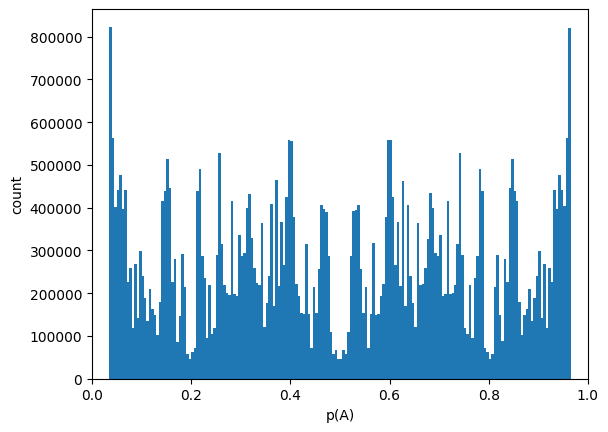

In [76]:
import matplotlib.pyplot as plt

print(bayes_probs.shape)
n_p_bins = 200
bin_edges = np.linspace(0, 1, n_p_bins+1)  # Creates 5 edges for 4 bins
print(bin_edges)
bins = np.digitize(bayes_probs, bin_edges[:-1]) - 1
print(bins)
bin_counts = np.bincount(bins.flatten(), minlength=n_p_bins)

# bins = np.digitize(p_A, bin_edges) - 1
# # q: how do I count the occurrences of each bin?
# bin_counts = np.bincount(bins.flatten(), minlength=n_p_bins)
plt.bar(bin_edges[:-1], bin_counts, width=np.diff(bin_edges), align='edge', capsize=2)
plt.xlim([0,1])
plt.xlabel('p(A)')
plt.ylabel('count')
# plt.hist(x=bin_edges[:-1], height=bin_counts, width=np.diff(bin_edges))
# plt.hist(np.flip(bin_edges), np.flip(bin_counts), width=0.01)

# plt.plot(bayes_probs)
# plt.xlim(0, 200)

(504, 100000)
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[[80 91 55 ... 79 91 55]
 [19  8  4 ... 47 78 91]
 [19  8  4 ... 63 86 93]
 ...
 [19 58 24 ...  3  3  3]
 [19  8 44 ... 58 24 62]
 [19  8 44 ... 65 87 49]]


Text(0, 0.5, 'count')

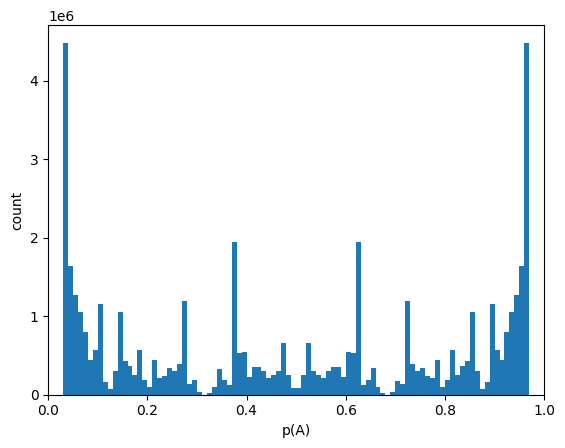

In [23]:
import matplotlib.pyplot as plt

print(bayes_probs.shape)
n_p_bins = 100
bin_edges = np.linspace(0, 1, n_p_bins+1)  # Creates 5 edges for 4 bins
print(bin_edges)
bins = np.digitize(bayes_probs, bin_edges[:-1]) - 1
print(bins)
bin_counts = np.bincount(bins.flatten(), minlength=n_p_bins)

# bins = np.digitize(p_A, bin_edges) - 1
# # q: how do I count the occurrences of each bin?
# bin_counts = np.bincount(bins.flatten(), minlength=n_p_bins)
plt.bar(bin_edges[:-1], bin_counts, width=np.diff(bin_edges), align='edge', capsize=2)
plt.xlim([0,1])
plt.xlabel('p(A)')
plt.ylabel('count')
# plt.hist(x=bin_edges[:-1], height=bin_counts, width=np.diff(bin_edges))
# plt.hist(np.flip(bin_edges), np.flip(bin_counts), width=0.01)

# plt.plot(bayes_probs)
# plt.xlim(0, 200)

In [25]:
%load_ext autoreload
%autoreload 2

import numpy as np
from config import Conf
from curriculum import DataCurriculum
from logger import LearningLogger
import torch

Conf.batch_size = 504
Conf.reward_prob = 0.8
Conf.n_reversals = 1000000
n_trials = 100000
Conf.sample = False
Conf.max_trials_since_reversal = 6

data_curriculum = DataCurriculum(Conf, eval=True)
logger = LearningLogger(Conf)
bayes_probs = []

next_input, next_target, ground_truth = data_curriculum.step()
# bayes_probs.append(data_curriculum.optimal_agent.p_A_high)

for i in range(n_trials):
    next_input, next_target, ground_truth = data_curriculum.step(ground_truth=ground_truth)
    
    # Convert data to tensors
    data_tensor = torch.tensor(next_input, dtype=Conf.dtype, device=Conf.dev)
    target_tensor = torch.tensor(next_target, dtype=Conf.dtype, device=Conf.dev)

    bayes_probs.append(data_curriculum.optimal_agent.p_A_high)
    
    # logger.log(None, target_tensor.cpu().detach(), data_tensor.cpu().detach(), ground_truth)

bayes_probs = np.concatenate(bayes_probs, axis=-1)
# logger.get_data()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Tr

KeyboardInterrupt: 

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

inputs, targets, ground_truth, accs = logger.inputs_hist, logger.targets_hist, logger.ground_truth_hist, logger.accuracy_steps

b = 0
trials = 100
t = Conf.trial_len * trials
sf = 1.1

fig, axes = plt.subplots(1,3, figsize=(sf*2, sf*t//20), dpi=200)
axes[0].imshow(inputs[b, :t, :], vmin=0, vmax=1, aspect='auto')
axes[0].set_title('Input', fontsize=8)
axes[0].set_ylabel('Trial #')
axes[1].imshow(ground_truth[b, :t, :], vmin=0, vmax=1, aspect='auto')
axes[1].set_title('Ground truth', fontsize=8)
axes[2].imshow(targets[b, :t, :], vmin=0, vmax=1, aspect='auto')
axes[2].set_title('Bayes', fontsize=8)

# Set yticks at every 4th row and enable gridlines only for those ticks
for i, ax in enumerate(axes):
    start, gap, rows = Conf.trial_len-0.5, Conf.trial_len, t
    ax.xaxis.grid(False)
    # Generate ytick locations, starting from 3.5 (since we want lines between blocks of 4)
    yticks = np.arange(start, rows, gap)
    ax.set_yticks(yticks)

    # Enable grid only for y-axis
    ax.yaxis.grid(True, linestyle='-', color='white', linewidth=2)

for ax in axes:
    ax.set_yticklabels([])
    ax.set_xticklabels([])

plt.tight_layout(rect=[0, 0, 1, 0.985]) # Adjust layout to make space for suptitle
plt.show()

fig.savefig(os.path.join(Conf.save_dir, 'panel.png'))


AttributeError: 'LearningLogger' object has no attribute 'inputs_hist'

In [43]:
from bayes import BayesAgent

batch_size = choices.shape[0]

agent = BayesAgent(batch_size=batch_size, p=1)



In [26]:
import numpy as np
from itertools import permutations

def get_all_layouts(port_dim):
    """
    Generate all possible layouts consisting of 3 unique one-hot vectors of dimension port_dim.

    Args:
    port_dim (int): The dimension of the one-hot vectors.

    Returns:
    numpy.ndarray: An array of shape (n, port_dim, 3) containing all possible layouts.
    """
    # Generate all permutations of indices for port_dim
    perms = permutations(range(port_dim), 3)

    # Initialize list to store all layouts
    all_layouts = []

    # Create one-hot vectors for each permutation
    for perm in perms:
        layout = np.zeros((3, port_dim))
        for i, index in enumerate(perm):
            layout[i, index] = 1
        all_layouts.append(layout)

    # Convert list to numpy array
    return np.array(all_layouts)

# Example usage
port_dim = 6  # Example port dimension
all_layouts = get_all_layouts(port_dim)
all_layouts.shape  # Check the shape of the resulting array


(120, 3, 6)

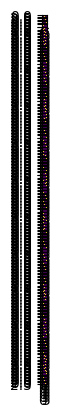

In [27]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(all_layouts.shape[0],1)

for i, ax in enumerate(axes):
    ax.imshow(all_layouts[i])

In [28]:
def split_train_test_balanced(all_layouts, port_dim, train_ratio=0.5):
    """
    Split the layouts into train and test sets with a given ratio, ensuring that each possible 
    initiation position (perm[0]) and choice positions ([perm[1], perm[2]]) are split according to 
    the specified ratio.

    Args:
    all_layouts (numpy.ndarray): The array containing all layouts.
    port_dim (int): The dimension of the one-hot vectors.
    train_ratio (float): The ratio of layouts to include in the training set.

    Returns:
    tuple: Two numpy arrays representing the train and test sets.
    """
    # Initialize lists to store train and test layouts
    train_layouts = []
    test_layouts = []

    # Counters for initiation and choice positions in train and test sets
    count_train_init = {i: 0 for i in range(port_dim)}
    count_train_choice = {i: 0 for i in range(port_dim)}
    count_test_init = {i: 0 for i in range(port_dim)}
    count_test_choice = {i: 0 for i in range(port_dim)}

    # Shuffle layouts
    np.random.shuffle(all_layouts)

    # Function to check if adding to train/test set is possible
    def can_add(count_dict, position, max_count):
        return count_dict[position] < max_count

    # Iterate over layouts to assign them to train/test sets
    for layout in all_layouts:
        init_pos = np.argmax(layout[0])
        choice_pos = [np.argmax(layout[1]), np.argmax(layout[2])]

        # Calculate max allowed counts for train and test sets
        max_train_count = train_ratio * len(all_layouts) // port_dim
        max_test_count = (1 - train_ratio) * len(all_layouts) // port_dim

        # Try adding to train set
        if (can_add(count_train_init, init_pos, max_train_count) and 
            all(can_add(count_train_choice, pos, max_train_count) for pos in choice_pos)):
            train_layouts.append(layout)
            count_train_init[init_pos] += 1
            for pos in choice_pos:
                count_train_choice[pos] += 1
        # Try adding to test set
        elif (can_add(count_test_init, init_pos, max_test_count) and 
              all(can_add(count_test_choice, pos, max_test_count) for pos in choice_pos)):
            test_layouts.append(layout)
            count_test_init[init_pos] += 1
            for pos in choice_pos:
                count_test_choice[pos] += 1

    return np.array(train_layouts), np.array(test_layouts)

# Splitting the layouts into train and test sets
train_layouts, test_layouts = split_train_test_balanced(all_layouts, port_dim)
train_layouts.shape, test_layouts.shape  # Check the shapes of the train and test sets


((29, 3, 6), (29, 3, 6))

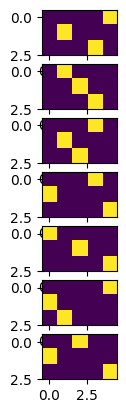

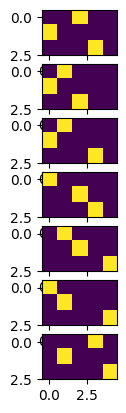

In [24]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(train_layouts.shape[0],1)

for i, ax in enumerate(axes):
    ax.imshow(train_layouts[i])

import matplotlib.pyplot as plt
fig, axes = plt.subplots(test_layouts.shape[0],1)

for i, ax in enumerate(axes):
    ax.imshow(test_layouts[i])

In [30]:
import random

def generate_and_split_permutations(port_dim, train_ratio=0.8):
    """
    Generate all permutations and split them into two sets while ensuring that equivalent
    permutations end up in the same set and respecting the 80:20 distribution ratio.

    Args:
    port_dim (int): The range of numbers to generate permutations from.
    train_ratio (float): The ratio of permutations to include in the training set.

    Returns:
    tuple: Two lists representing the train and test sets.
    """
    # Generate all permutations
    perms = permutations(range(port_dim), 3)

    # Group permutations into entities where (x, y, z) and (x, z, y) are treated as one
    perm_entities = {(x, y, z) for x, y, z in perms}

    # Shuffle entities
    perm_entities = list(perm_entities)
    random.shuffle(perm_entities)

    # Initialize train and test sets
    train_set = []
    test_set = []

    # Counters for initiation and choice ports
    init_port_counter = {i: 0 for i in range(port_dim)}
    choice_port_counter = {frozenset([i, j]): 0 for i in range(port_dim) for j in range(port_dim) if i != j}

    # Split entities into train and test sets
    for entity in perm_entities:
        x, y, z = entity

        # Calculate whether this entity should go into train or test set
        if (init_port_counter[x] < train_ratio * port_dim * (port_dim - 1) and 
            choice_port_counter[frozenset([y, z])] < train_ratio * port_dim * (port_dim - 1) * (port_dim - 2) / 2):
            train_set.extend([entity, (x, z, y)])
            init_port_counter[x] += 2
            choice_port_counter[frozenset([y, z])] += 2
        else:
            test_set.extend([entity, (x, z, y)])

    return train_set, test_set

# Splitting the permutations into train and test sets
port_dim = 5  # Example port dimension
train_set, test_set = generate_and_split_permutations(port_dim)
len(train_set), len(test_set)  # Check the lengths of the train and test sets


(80, 40)

In [54]:
def generate_permutation_sets(port_dim):
    """
    Generate sets of permutations for each initiation port and each pair of choice ports.

    Args:
    port_dim (int): The range of numbers to generate permutations from.

    Returns:
    dict, dict: Two dictionaries containing sets of permutations for initiation ports and choice ports.
    """
    # Generate all permutations
    perms = list(permutations(range(port_dim), 3))

    # Dictionaries for initiation port sets and choice port sets
    # init_port_sets = {i: set() for i in range(port_dim)}
    choice_port_sets = {frozenset([i, j]): set() for i in range(port_dim) for j in range(port_dim) if i != j}

    # Populate the sets
    for perm in perms:
        x, y, z = perm
        # init_port_sets[x].add(perm)
        choice_port_sets[frozenset([y, z])].add(perm)

    return choice_port_sets


In [177]:
print(test[0])
print(init[0])
print(a[0])
print(b[0])
print(test)

[0 3 1]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[[0 3 1]
 [4 3 1]
 [0 1 3]
 [2 1 3]
 [4 1 3]
 [2 3 1]
 [3 4 0]
 [1 0 4]
 [1 4 0]
 [2 4 0]
 [2 0 4]
 [3 0 4]]


In [84]:
%load_ext autoreload
%autoreload 2

from curriculum import train_test_split

train, test, all = train_test_split()

print(len(train), len(test))

print(np.unique(train[:,0], return_counts=True))
print(np.unique(test[:,0], return_counts=True))

print(np.unique(train[:,1], return_counts=True))
print(np.unique(test[:,1], return_counts=True))

print(np.unique(train[:,2], return_counts=True))
print(np.unique(test[:,2], return_counts=True))

# print(len(all))# q: how to count instances of each number in a column?
print(all[:20])
# a:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
378 126
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([42, 42, 42, 42, 42, 42, 42, 42, 42]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([14, 14, 14, 14, 14, 14, 14, 14, 14]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([42, 42, 42, 42, 42, 42, 42, 42, 42]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([14, 14, 14, 14, 14, 14, 14, 14, 14]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([42, 42, 42, 42, 42, 42, 42, 42, 42]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([14, 14, 14, 14, 14, 14, 14, 14, 14]))
[[0 1 2]
 [0 1 3]
 [0 1 4]
 [0 1 5]
 [0 1 6]
 [0 1 7]
 [0 1 8]
 [0 2 1]
 [0 2 3]
 [0 2 4]
 [0 2 5]
 [0 2 6]
 [0 2 7]
 [0 2 8]
 [0 3 1]
 [0 3 2]
 [0 3 4]
 [0 3 5]
 [0 3 6]
 [0 3 7]]


In [81]:
a = np.where(test[:,-1]==4)
b = np.where(test[:,-1]==3)
print(test[a,:])
print(test[b,:])

[[[0 5 4]
  [1 5 4]
  [2 5 4]
  [3 5 4]
  [6 5 4]
  [7 5 4]
  [8 5 4]]]
[[[0 6 3]
  [1 6 3]
  [2 6 3]
  [4 6 3]
  [5 6 3]
  [7 6 3]
  [8 6 3]
  [0 2 3]
  [1 2 3]
  [4 2 3]
  [5 2 3]
  [6 2 3]
  [7 2 3]
  [8 2 3]]]
